<a href="https://colab.research.google.com/github/grjadhav409/ATG4B-inhibitors-prediction-using-ML/blob/main/2_1_feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
d1= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/drug discovery/ATG4B/data_atg4b/X_CircularFingerprint.csv")
d2= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/drug discovery/ATG4B/data_atg4b/X_MACCSKeysFingerprint.csv")
d3= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/drug discovery/ATG4B/data_atg4b/X_Mordred.csv")
d4= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/drug discovery/ATG4B/data_atg4b/X_rdkit.csv")
d5= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/drug discovery/ATG4B/data_atg4b/y_pic50.csv")
#df6= pd.read_csv("")

# concat dfs
df=pd.concat([d1,d2,d3,d4,d5], axis=1)
df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,200,201,202,203,204,205,206,207,Unnamed: 0,pIC50
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4.876148
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5.048662
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,4.735182
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,4.767004
4,4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4.928118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,369,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,369,4.464706
370,370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,370,4.677781
371,371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,371,4.244125
372,372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,372,4.701147


In [ ]:
#drop unnamed
df1 =df.loc[:, ~df.columns.str.contains('^Unnamed')]
df1

,0,1,2,3,4,5,6,7,8,9,...,199,200,201,202,203,204,205,206,207,pIC50
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.876148
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.048662
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.735182
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.767004
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.928118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.464706
370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.677781
371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.244125
372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.701147


In [ ]:
# checking Infinite values
count = np.isinf(df1).values.sum()
print("It contains " + str(count) + " infinite values")

It contains 0 infinite values


In [ ]:
# total count of NaN values
print(df1.isnull().sum().sum())

0


In [ ]:
X = df1.drop(['pIC50'], axis = 1)
X

,0,1,2,3,4,5,6,7,8,9,...,198,199,200,201,202,203,204,205,206,207
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
### It is always a good practice to split train and test data to avoid
#overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df1.drop(labels=['pIC50'], axis=1),
    df1['pIC50'],
    test_size=0.2,
    random_state=0)

In [ ]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train.fillna(0), y_train)
mutual_info

array([0.00113739, 0.12225264, 0.06203234, ..., 0.        , 0.00793111,
       0.04329301])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

1334    0.180217
621     0.169634
1777    0.169564
1034    0.166074
1250    0.163852
          ...   
623     0.000000
619     0.000000
382     0.000000
383     0.000000
775     0.000000
Length: 3225, dtype: float64

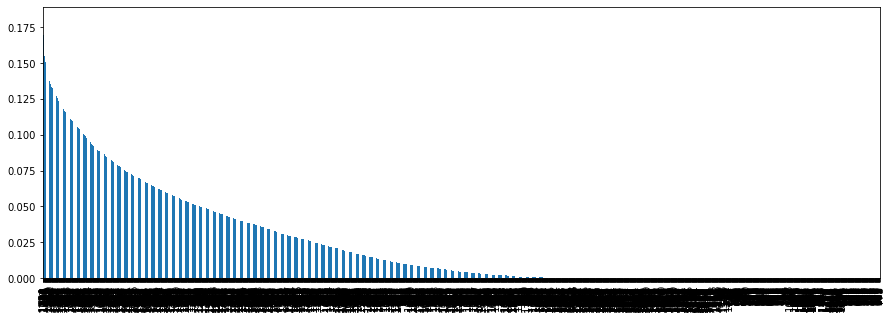

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [ ]:
from sklearn.feature_selection import SelectPercentile

In [ ]:
## Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=1)
selected_top_columns.fit(X_train.fillna(0), y_train)

SelectPercentile(percentile=1,
                 score_func=<function mutual_info_regression at 0x7ff508342200>)

In [ ]:
selected_top_columns.get_support()

array([False, False, False, ..., False, False, False])

In [ ]:
columns= X_train.columns[selected_top_columns.get_support()]
#column_df= pd.DataFrame(data=columns)
#column_df
columns

Index(['54', '138', '168', '177', '223', '260', '262', '345', '370', '396',
       '413', '477', '482', '488', '496', '576', '621', '650', '653', '832',
       '955', '1034', '1250', '1263', '1322', '1334', '1350', '1516', '1584',
       '1777', '22', '45', '134'],
      dtype='object')

In [ ]:
df2 = df1[['54', '138', '168', '177', '223', '260', '262', '345', '370', '396',
       '413', '477', '482', '488', '496', '576', '621', '650', '653', '832',
       '955', '1034', '1250', '1263', '1322', '1334', '1350', '1516', '1584',
       '1777', '22', '45', '134']].copy()
df2

,54,54,54,54,138,138,138,138,168,168,...,22,22,45,45,45,45,134,134,134,134
0,0.0,0,199.774691,0.000000,0.0,1,4.749373,3.0,0.0,19.128440,...,8.0,-2.250958,0.0,0,240.0,5.106527,0.0,0,8.371717,1.0
1,0.0,0,146.939815,0.000000,0.0,0,9.340040,1.0,0.0,42.320755,...,13.0,-2.175070,0.0,0,175.0,5.733667,1.0,1,17.338578,0.0
2,0.0,0,109.575103,12.628789,0.0,1,2.654147,1.0,0.0,17.680851,...,4.0,-2.173585,0.0,0,127.0,5.316789,0.0,1,7.156137,0.0
3,0.0,0,131.432099,0.000000,0.0,0,2.745318,1.0,0.0,27.575758,...,6.0,-2.289170,0.0,0,156.0,5.106527,0.0,0,7.372222,1.0
4,0.0,0,149.055556,0.000000,0.0,1,2.476510,2.0,0.0,12.341880,...,5.0,-2.450226,0.0,0,218.0,10.216698,0.0,0,5.518519,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0.0,1,171.388889,0.000000,0.0,1,4.074766,0.0,0.0,17.313725,...,7.0,-2.498266,0.0,0,181.0,15.370440,0.0,1,8.750000,3.0
370,0.0,0,178.374486,0.000000,0.0,0,6.637626,4.0,0.0,27.265625,...,12.0,-2.164130,0.0,0,197.0,19.637997,0.0,1,11.743092,1.0
371,1.0,0,247.666667,0.000000,0.0,0,10.704545,0.0,0.0,20.841026,...,8.0,-2.102140,0.0,0,341.0,30.639164,0.0,0,11.925926,0.0
372,0.0,0,177.111111,5.098682,0.0,0,4.928571,3.0,0.0,18.417582,...,8.0,-2.157777,0.0,0,193.0,20.524182,0.0,0,8.458333,1.0


In [ ]:
df3= pd.concat([df2,df1['pIC50']],axis=1)

In [ ]:
df3

,54,54,54,54,138,138,138,138,168,168,...,22,45,45,45,45,134,134,134,134,pIC50
0,0.0,0,199.774691,0.000000,0.0,1,4.749373,3.0,0.0,19.128440,...,-2.250958,0.0,0,240.0,5.106527,0.0,0,8.371717,1.0,4.876148
1,0.0,0,146.939815,0.000000,0.0,0,9.340040,1.0,0.0,42.320755,...,-2.175070,0.0,0,175.0,5.733667,1.0,1,17.338578,0.0,5.048662
2,0.0,0,109.575103,12.628789,0.0,1,2.654147,1.0,0.0,17.680851,...,-2.173585,0.0,0,127.0,5.316789,0.0,1,7.156137,0.0,4.735182
3,0.0,0,131.432099,0.000000,0.0,0,2.745318,1.0,0.0,27.575758,...,-2.289170,0.0,0,156.0,5.106527,0.0,0,7.372222,1.0,4.767004
4,0.0,0,149.055556,0.000000,0.0,1,2.476510,2.0,0.0,12.341880,...,-2.450226,0.0,0,218.0,10.216698,0.0,0,5.518519,1.0,4.928118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0.0,1,171.388889,0.000000,0.0,1,4.074766,0.0,0.0,17.313725,...,-2.498266,0.0,0,181.0,15.370440,0.0,1,8.750000,3.0,4.464706
370,0.0,0,178.374486,0.000000,0.0,0,6.637626,4.0,0.0,27.265625,...,-2.164130,0.0,0,197.0,19.637997,0.0,1,11.743092,1.0,4.677781
371,1.0,0,247.666667,0.000000,0.0,0,10.704545,0.0,0.0,20.841026,...,-2.102140,0.0,0,341.0,30.639164,0.0,0,11.925926,0.0,4.244125
372,0.0,0,177.111111,5.098682,0.0,0,4.928571,3.0,0.0,18.417582,...,-2.157777,0.0,0,193.0,20.524182,0.0,0,8.458333,1.0,4.701147


In [ ]:
df3.to_csv('feat.csv')
!cp X_Mordred.csv "/content/drive/MyDrive/Colab Notebooks/drug discovery/ATG4B/data_atg4b"